 
'*** Small  Brief ***

We use various metrics to determine the number of clusters. 
I selected the WCSS method to identify the optimal number of clusters from the graph below. 
Based on the elbow point, which is between 4 and 6 clusters, I have chosen 5 clusters to train the model. 


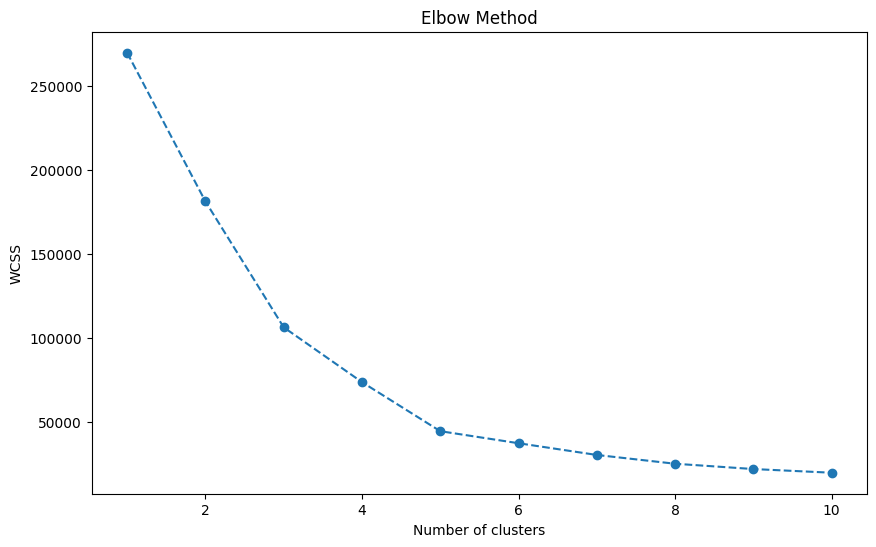

--------------------------------------------------------------------------


*** Small  Brief ***


After training and predicting values with the input data,
we obtained the following results. We divided customers into different clusters based 
on their existing data to analyze spending patterns
relative to their annual income. This segmentation allows us to strategically target marketing campaigns 
and focus on customer segments that offer the most potential for business growth. 
The graph below provides insights for targeted marketing campaigns and other strategic purposes.


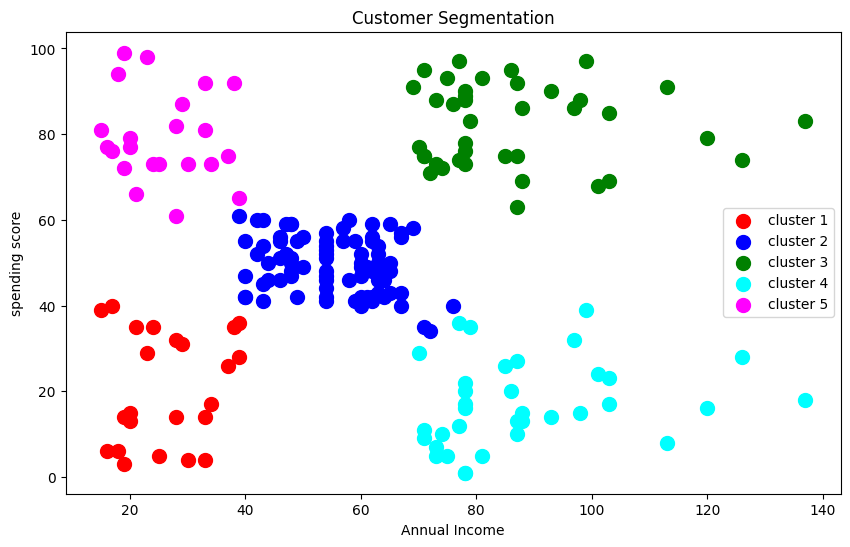

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


In [63]:
# Step 1: Load the dataset

import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.cluster import KMeans

# Load the dataset
data =pd.read_csv("Mall_Customers.csv")


data.isnull().sum()
data.duplicated().sum()


# Step 2: Perform data preprocessing
# Extract the relevant features

X = data.iloc[:, [3, 4]].values # Annual Income and Spending Score



# Step 3: Apply K-Means Clustering
# Use the elbow method to determine the number of clusters

WCSS = []

for i in range(1,11):
  kmeans = KMeans(n_clusters =i,  init='k-means++', max_iter = 300, n_init = 10, random_state = 40)
  kmeans.fit(x)
  WCSS.append(kmeans.inertia_)

# Plot the elbow method graph

print('''
'*** Small  Brief ***

We use various metrics to determine the number of clusters.
I selected the WCSS method to identify the optimal number of clusters from the graph below.
Based on the elbow point, which is between 4 and 6 clusters, I have chosen 5 clusters to train the model. ''')

plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), WCSS, marker = 'o', linestyle = '--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

print('--------------------------------------------------------------------------')

# Fit the K-Means al gorithm to the dataset with the optimal number of clusters

kmeans = KMeans(n_clusters=5,init='k-means++',max_iter = 300, n_init=10, random_state=40)
ymeans = kmeans.fit_predict(X)

print('''

*** Small  Brief ***


After training and predicting values with the input data,
we obtained the following results. We divided customers into different clusters based
on their existing data to analyze spending patterns
relative to their annual income. This segmentation allows us to strategically target marketing campaigns
and focus on customer segments that offer the most potential for business growth.
The graph below provides insights for targeted marketing campaigns and other strategic purposes.''')

plt.figure(figsize=(10,6))
plt.scatter(X[ymeans == 0,0], X[ymeans == 0,1], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(X[ymeans == 1,0], X[ymeans == 1,1], s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(X[ymeans == 2,0], X[ymeans == 2,1], s = 100, c = 'green', label = 'cluster 3')
plt.scatter(X[ymeans == 3,0], X[ymeans == 3,1], s = 100, c = 'cyan', label = 'cluster 4')
plt.scatter(X[ymeans == 4,0], X[ymeans == 4,1], s = 100, c = 'magenta', label = 'cluster 5')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('spending score')
plt.legend()
plt.show()


# Step 5: Interpret the results
# Add cluster labels to the original data
data['clusters'] = ymeans
data.head()


# New Section

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
